### #1, #2: 
#### Make an SVD analysis of your own grayscale photo. Present at least three different ways of reconstruction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import warnings
import os
from numpy import random as rand
from scipy.special import gamma
warnings.filterwarnings("ignore") 

In [2]:
#Read in picture of football player Justin Herbert 
fb = io.imread('/Users/vinceverdugo/Downloads/mathmodeling/Herbert.jpeg', 
                          as_gray=True)

In [3]:
#Perform SVD using linalg library
U,D,Vt = np.linalg.svd(fb, full_matrices = False)

In [4]:
#Using code from textbook to show difference between each reconstruction
def gray_scale_convert(image):
    rescaled_image = np.zeros((image.shape[0], image.shape[1]))
    rescaled_image[:, :] = image
    rescaled_image -= np.min(rescaled_image)
    rescaled_image /= np.max(rescaled_image)
    return rescaled_image

def image_comparison(original_image, reduced_image):
    gscale_reduced_image = gray_scale_convert(reduced_image)
    difference = np.abs( original_image - gscale_reduced_image )

    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    ax = axes.ravel()
    ax[0].imshow(original_image, cmap=plt.cm.gray)
    ax[0].set_title("Original")
    ax[1].imshow(gscale_reduced_image, cmap=plt.cm.gray) 
    ax[1].set_title("Reconstruction")
    ax[2].imshow(difference, cmap=plt.cm.gray)
    ax[2].set_title("Difference")
    fig.tight_layout()

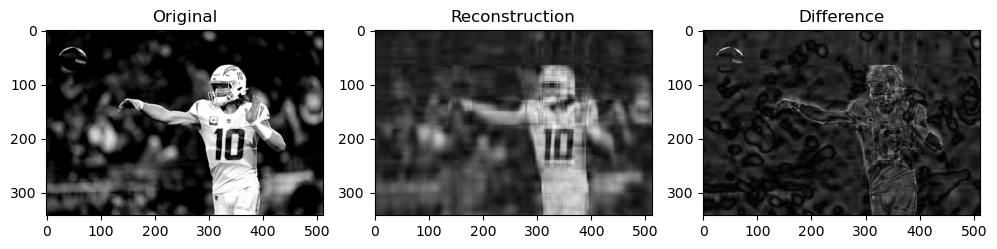

In [5]:
#Reconstruction using the first 10 modes
m1 = 10 + 1
#SVD formula
rcon1 = U[:,0:m1] @ np.diag(D[0:m1]) @ Vt[0:m1, :]
image_comparison(fb, rcon1)

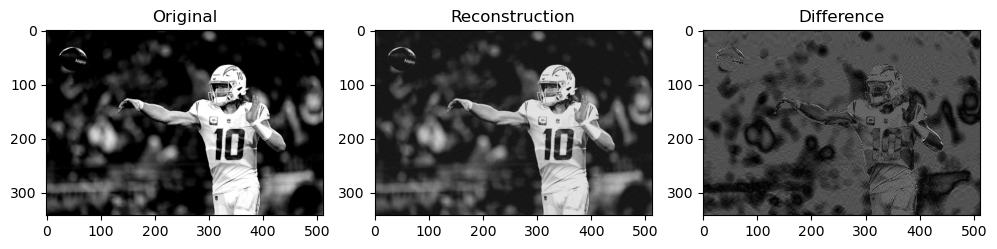

In [6]:
#Reconstruction using the first 100 modes
m2 = 100 + 1
#SVD formula
rcon2 = U[:,0:m2] @ np.diag(D[0:m2]) @ Vt[0:m2, :]
image_comparison(fb, rcon2)

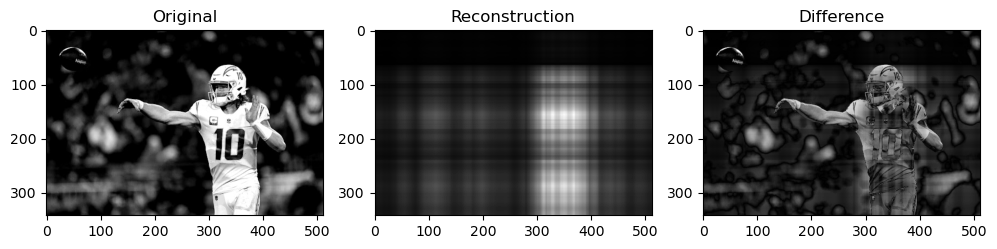

In [7]:
#Reconstruction using values that are one tenth the largest
Dmax = np.max(D)
Dmvals = np.log(D/Dmax) >= -1
rcon3 = U[:,Dmvals] @ np.diag(D[Dmvals]) @ Vt[Dmvals, :]
image_comparison(fb, rcon3)

### 7.1
#### Suppose that the greenhouse effect results in a net energy gain of the Earth’s surface by 1.0 (W/m^2). If the gained heat is all used to heat the Earth’s atmosphere, how many years will be needed to warm the Earth’s entire atmosphere by 1.0◦C? If the heat is all used to heat the Earth’s surface water, including the water in the oceans, lakes, and rivers, how many years will it take to warm the water by 1.0◦C? Make comments about this study’s implications for global warming.

### 7.5 
#### Repeat Elisha Mitchell’s calculation with the current data you can find online, such as the North Carolina Climate Office NC ECONet, and make your own estimation of the elevation of Mount Mitchell using the hypsometric equation.

In [8]:
#Hyposmetric equation
#R, g constants
R = 287.055
g = 9.80665
#Use https://econet.climate.ncsu.edu for current conditions
#ELEVATION LEVELS ARE STRAIGHT FROM ECONET.CLIMATE.NCSU.EDU
#econet.climate.ncsu.edu --> STATION --> STATION INFORMATION 
#Location1 will be Burnsville Tower (BURN)
#Location2 will be Mt Mitchell (MITC)
#T1, T2 in kelvin
#p1, p2 in mb
#z1, z2 in meters
T1 = ((72.1-32)*(5/9))+273.15
T2 = ((59.4-32)*(5/9))+273.15
p1 = 928.7
p2 = 818.8
z1 = 2689*0.3048
z2 = z1 + ((2*R*T1*T2)/(g*(T1+T2)))*np.log(p1/p2)
print(f'Estimated elevation of Mount Mitchell Station: {z2/0.3048:.0f} feet above sea level')
print(f'Actual height of Mount Mitchell Station: 6215 feet above sea level')
print(f'Results approximately {(z2/0.3048)-6215:.0f} feet apart with ~{(((z2/0.3048)-6215)/6219)*100:.2f}% error')

Estimated elevation of Mount Mitchell Station: 6219 feet above sea level
Actual height of Mount Mitchell Station: 6215 feet above sea level
Results approximately 4 feet apart with ~0.07% error


### 7.6 
#### Calculate the elevation of a high mountain peak near your location, or in another place with which you are familiar, using observed data and the hypsometric equation. 

In [9]:
#Estimating elevation for Boucher Hill in Palomar Mountain State Park, CA
#Location3 will be Escondido, CA 
#Location4 will be Boucher Hill, Palomar Mountain State Park, CA
#Escondido info link: https://www.weather.gov/wrh/timeseries?site=E3236&hours=72
#Boucher Hill info link: https://www.weather.gov/wrh/timeseries?site=HP014&hours=72
#The two stations are approximately 18 km away
T3 = (18)+273.15
T4 = (15)+273.15
p3 = 988.44
p4 = 827.70
z3 = 600*0.3048
z4 = z3 + ((2*R*T3*T4)/(g*(T3+T4)))*np.log(p3/p4)
print(f'Estimated elevation of Boucher Hill Station: {z4/0.3048:.0f} feet above sea level')
print(f'Actual height of Boucher Hill Station: 5413 feet above sea level')
print(f'Results approximately {(z4/0.3048)-5413:.0f} feet apart with ~{(((z4/0.3048)-5413)/5413)*100:.2f}% error')

Estimated elevation of Boucher Hill Station: 5537 feet above sea level
Actual height of Boucher Hill Station: 5413 feet above sea level
Results approximately 124 feet apart with ~2.28% error


### 7.7
#### (b) Suppose that (i) an isothermal layer has an average temperature 253K, (ii) the layer’s bottom is at the sea level with z1 = 0 and p1 = 1000[mb], and (iii) the isothermal layer’s top pressure is p2 = 500[mb] . Calculate the isothermal layer’s top coordinate z2 using the formula derived in (a) and using a calculator or R.

In [10]:
T = 253
p5 = 1000
p6 = 500
z5 = ((R*T)/(g))*np.log(p5/p6)
print(f"Layer's top coordinate: {z5:.0f} units")

Layer's top coordinate: 5133 units


### #7a
#### State Buffon’s needle problem with text and diagram(s).

Buffon's needle problem describes this, suppose there are lines on the floor that are an even length 'd' distance apart. If you a needle with length '$\ell$', what is the probability that when dropped, the needle will be crossing a line. 

The probablity of '$\ell$' crossing is dependent on where on its length as well as the angle of the line, this will be denoted as '$\theta$'

When 'd' > '$\ell$', this looks like:

Suppose there are lines on the floor that are an even length 'd' distance apart. If you a needle with length '$\ell$', what is the probability that when dropped, the needle will be crossing a line. 

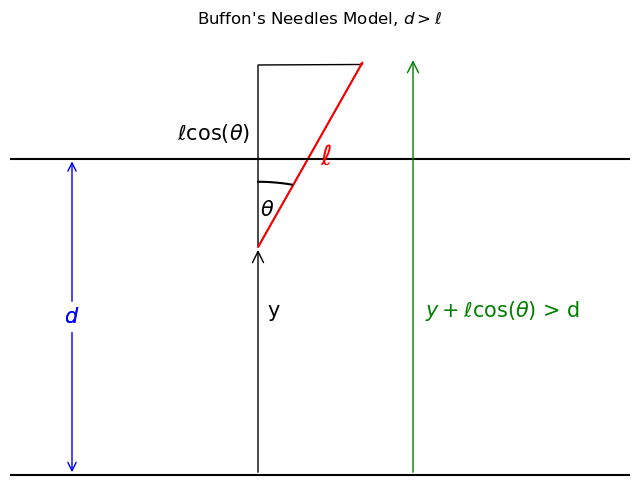

In [11]:
d = 1/2
l = d*(2/3)

# Graph parameters
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.axis('off')
ax.set_title("Buffon's Needles Model, $d > \ell$")
ax.set_xlim(0, 1)
ax.set_ylim(0.47, 1.2)

# Plot 'd' lines
for i in range(3):
    ax.axhline(y=i*d, color='black')

#Annotation for distance 'd'
ax.annotate("$d$", xy=(.1, 2*d), xytext=(.1, (3*d)/2), color='blue',
            fontsize=15, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'blue'})
ax.annotate("$d$", xy=(.1, d), xytext=(.1, (3*d)/2), color='blue',
            fontsize=15, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'blue'})

#Needle plot parameters
begin = (.4, .86)
arrowAng = np.pi/3
arrowLen = (l*np.cos(arrowAng), l*np.sin(arrowAng))

#Calculate plot points using lines of the triangle 
triangle_points = [begin, 
                   (begin[0] + arrowLen[0], begin[1] + arrowLen[1]),
                   (begin[0], begin[1] + arrowLen[1]*np.sin(arrowAng*np.pi/2))]
#Plot the triangle
triangle = plt.Polygon(triangle_points, closed=True, fill=None, edgecolor='k')
ax.add_patch(triangle)
#Annotate vertical side of triangle 
ax.annotate(r"$\ell$cos$(\theta)$", xy=(begin[0]-.13, begin[1]+0.17), color='k', fontsize=15)
#Plot theta line
ax.annotate(r"$\theta$", xy=(begin[0]+.003, begin[1]+0.05), color='k', fontsize=15)
theta_values = np.linspace(np.pi/2, np.pi/2.23456, 100)
curve_x = begin[0] + l*np.cos(theta_values)
curve_y = begin[1] + l*np.sin(theta_values)-.23
ax.plot(curve_x, curve_y, color='k')
#Plot needle and annotation info
#Plot needle at the end to better see it over the grey triangle line
ax.arrow(*begin, *arrowLen, fc='r', ec='r')
ax.annotate(r"$\ell$", xy=(begin[0]+.1, begin[1]+0.13), color='r', fontsize=20)
#Distance 'y'
ax.annotate("", xy=(.4, begin[1]), xytext=(.4,0.5), color='k',
            fontsize=20, horizontalalignment="center",
            verticalalignment="top", arrowprops={'arrowstyle':'->',
            'color':'k'})
ax.annotate(r"y", xy=(begin[0]+.015, begin[1]-0.11), color='k', fontsize=15)
#Annotation for 
ax.annotate("", xy=(.65, begin[1]+.3), xytext=(.65,0.5), color='k',
            fontsize=20, horizontalalignment="center",
            verticalalignment="top", arrowprops={'arrowstyle':'->',
            'color':'g'})
ax.annotate(r"$y + \ell$cos$(\theta)$ > d", xy=(begin[0]+.27, begin[1]-0.11), color='g', fontsize=15)

plt.show()

Above, we can see that our needle in red crosses the line. Using the angle theta and the length of the needle, we can create a right triangle from the endpoints in which its vertical side can be denoted as '$\ell$cos$(\theta)$'. The line denoted 'y', is the distance from the line to the beginning end of the needle. The sum of these two lines, y + $\ell$cos$(\theta)$, is greater than d. This is visualized by the green line denoted 'y + $\ell$cos$(\theta)$ > d'

Transforming this sum into a function of y, we obtain y = d - $\ell$cos$(\theta)$

Text(-0.15, 2, '$d$ = 2')

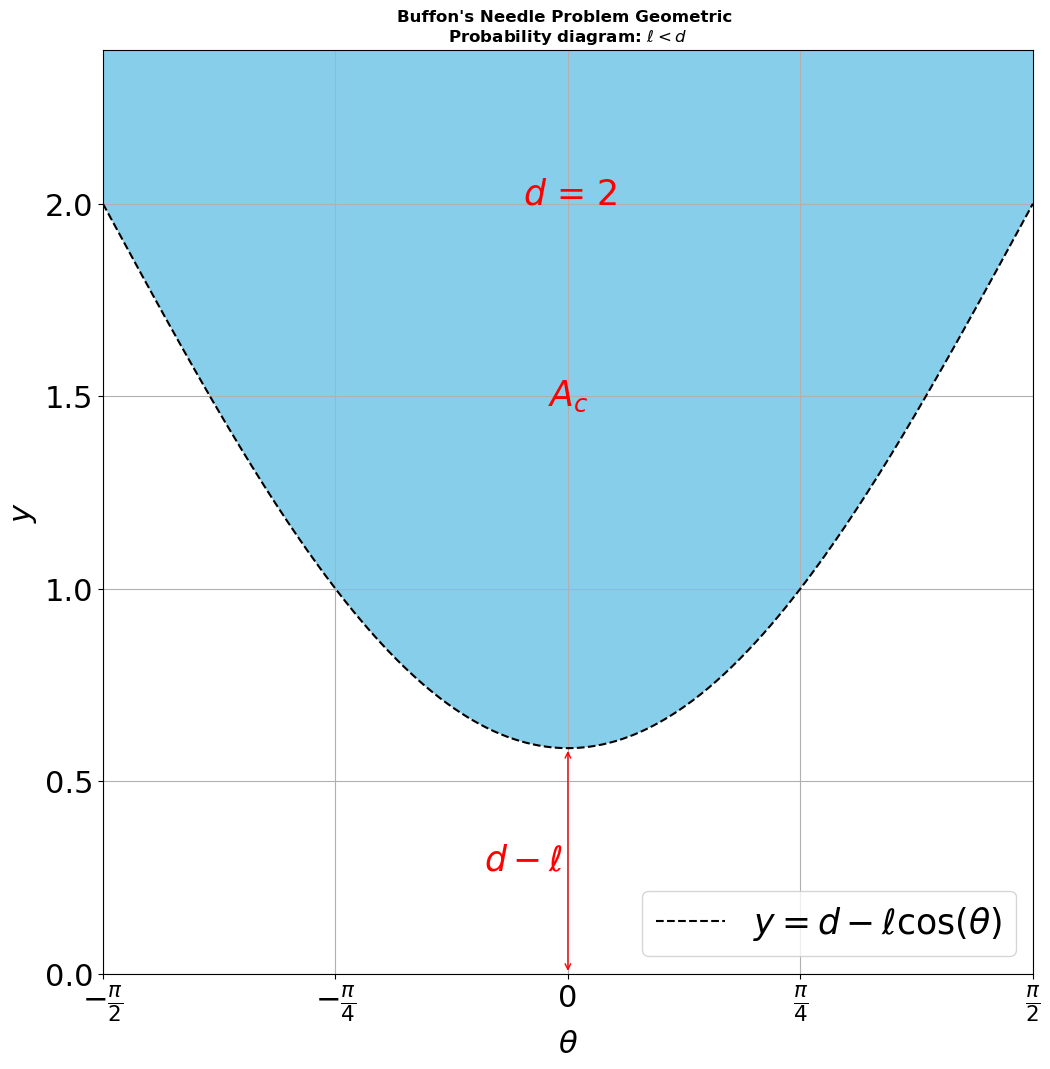

In [12]:
#Stawsky code
d = 2
l = np.sqrt(d)
x = np.linspace(-np.pi/2, np.pi/2, 1001)
buff = d-l*np.cos(x)

fig, ax = plt.subplots(1,1,figsize=(12,12));

ax.plot(x, buff, 'k--', label=r"$y = d-\ell\cos(\theta)$")

ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_ylim(0, d+0.4)
ax.set_title("Buffon's Needle Problem Geometric \nProbability diagram: $\ell < d$"
            ,fontweight="bold")
ax.fill_between(x, buff, 4*np.ones(x.size), fc='skyblue')

ax.set_xlabel(r"$\theta$",size=22)
ax.set_xticks([(np.pi/4)*i for i in range(-2, 3)])
ax.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$","0",
                    r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])

ax.set_ylabel("$y$",size=22)
ax.text(0, 1.5, "$A_{c}$", size=25, color='red',
            horizontalalignment="center", verticalalignment="center")
ax.legend(loc='lower right', fontsize=25)
ax.grid()
ax.tick_params(labelsize=22)
ax.annotate("", xy=(0,0), xytext=(0, d-l),
            arrowprops={'arrowstyle':'<->', 'color':'red'})
ax.text(-.15, (d-l)/2, "$d-\ell$", size=25, color='red',
            horizontalalignment="center", verticalalignment="center")
ax.text(-.15,2,"$d$ = 2",color='red',size=25)

The area in blue, $A_{c}$, is the area where l is crossing d. If $A$ is the total area of the graph, then the probability of crossing is given by $p$ = $A_{c}$/$A$

Given that $A_{c}$ = 2$\ell$, and $A$ = $\pi$d, then $p$ = (2/$\pi$)($\ell$/d)

### #7b
#### Derive the solution of Buffon’s needle problem when the needle length is longer than the gap of two lines.

However this solution is only applicable when 'd' > '$\ell$'. If '$\ell$' = '2d', then $p$ = 4/$\pi$ which is greater than 1. Since the probabilty cannot be greater than one we must find a new solution

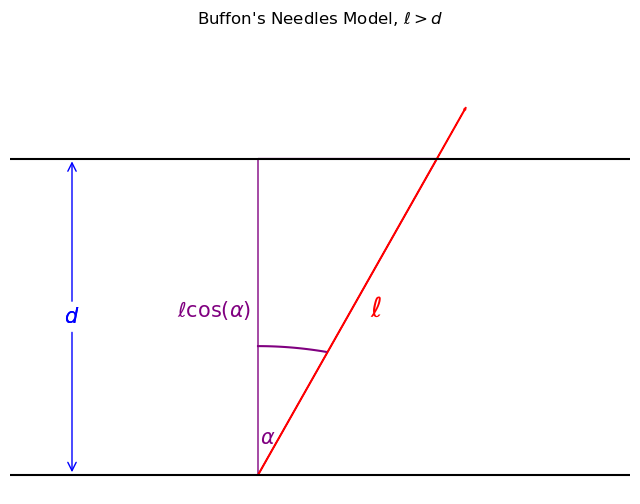

In [13]:
d = 1/2
l = d*(4/3)

# Graph parameters
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.axis('off')
ax.set_title("Buffon's Needles Model, $\ell > d$")
ax.set_xlim(0, 1)
ax.set_ylim(0.47, 1.2)

# Plot 'd' lines
for i in range(3):
    ax.axhline(y=i*d, color='black')

#Annotation for distance 'd'
ax.annotate("$d$", xy=(.1, 2*d), xytext=(.1, (3*d)/2), color='blue',
            fontsize=15, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'blue'})
ax.annotate("$d$", xy=(.1, d), xytext=(.1, (3*d)/2), color='blue',
            fontsize=15, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'blue'})

#Needle plot parameters
begin = (.4, .5)
arrowAng = np.pi/3
arrowLen = (l*np.cos(arrowAng), l*np.sin(arrowAng))

#Calculate plot points using lines of the triangle 
triangle_points = [begin,
                   (arrowLen[1]*np.sin(arrowAng)+.189, 1), 
                   (begin[0], 1)]
#Plot the triangle
triangle = plt.Polygon(triangle_points, closed=True, fill=None, edgecolor='purple')
ax.add_patch(triangle)
#Annotate vertical side of triangle 
ax.annotate(r"$\ell$cos$(\alpha)$", xy=(begin[0]-.13, begin[1]+0.25), color='purple', fontsize=15)
#Plot theta line
ax.annotate(r"$\alpha$", xy=(begin[0]+.003, begin[1]+0.05), color='purple', fontsize=15)
theta_values = np.linspace(np.pi/2, np.pi/2.23456, 100)
curve_x = begin[0] + l*np.cos(theta_values)
curve_y = begin[1] + l*np.sin(theta_values)-.463
ax.plot(curve_x, curve_y, color='purple')
#Plot needle and annotation info
#Plot needle at the end to better see it over the grey triangle line
ax.arrow(*begin, *arrowLen, fc='r', ec='r')
ax.annotate(r"$\ell$", xy=(begin[0]+.18, begin[1]+0.25), color='r', fontsize=20)
#Distance 'y'
ax.annotate("", xy=(.4, begin[1]), xytext=(.4,0.5), color='k',
            fontsize=20, horizontalalignment="center",
            verticalalignment="top", arrowprops={'arrowstyle':'->',
            'color':'k'})
ax.annotate(r"y", xy=(begin[0]+.015, begin[1]-0.11), color='k', fontsize=15)

plt.show()

In this plot, we can see that '$\ell$' will cross unless the angle of the needle is less than or equal to the angle created in the graph denoted '$\alpha$'

Modifying our graph we obtain

Text(-0.7853981633974483, 1.5, '$A_C$')

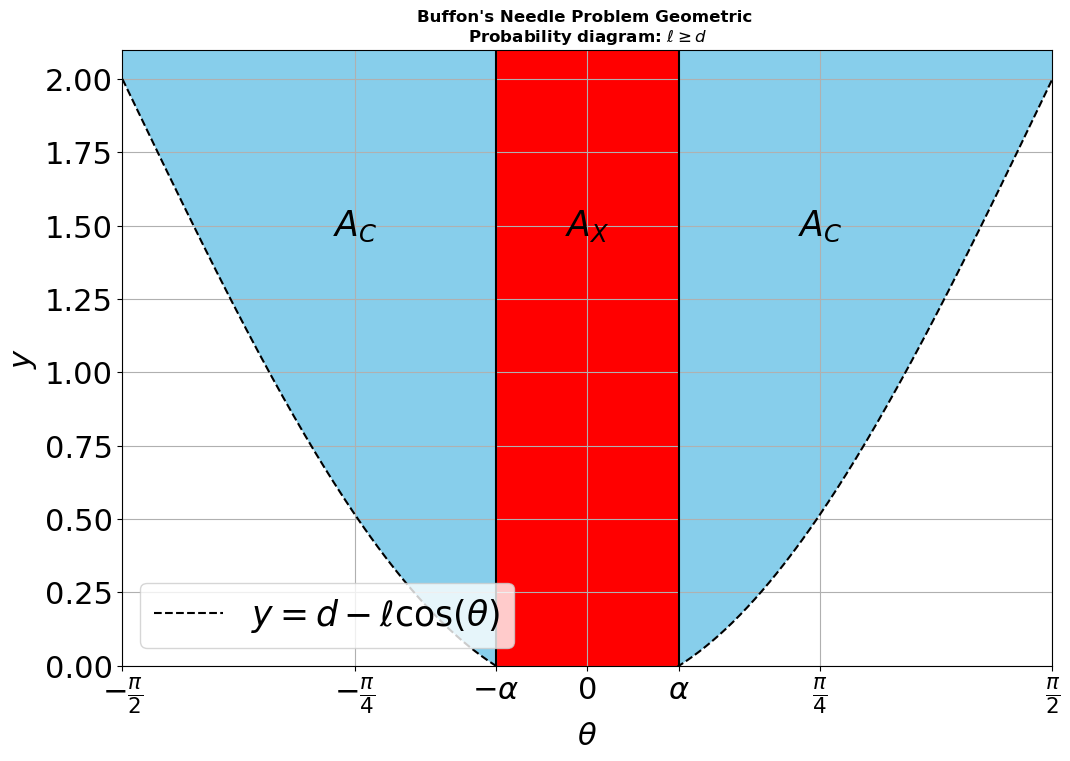

In [14]:
#Stawsky code
d = 2
l = d +.1
alpha = np.arccos(d/l)
buff2 = d-l*np.cos(x)

cross = [True if -alpha <= i <= alpha else False for i in x]
cond = [True if i is False else False for i in cross]

fig, ax = plt.subplots(1,1,figsize=(12,8));

ax.plot(x, buff2, 'k--', label=r"$y = d-\ell\cos(\theta)$")
ax.axvline(x=-alpha, color='k')
ax.axvline(x=alpha, color='k')

ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_ylim(0, d+.1)
ax.set_title("Buffon's Needle Problem Geometric \nProbability diagram: $\ell \geq d$"
            ,fontweight="bold")
ax.fill_between(x, buff2, 4*np.ones(x.size), where=cross, fc='red')
ax.fill_between(x, buff2, 4*np.ones(x.size), where=cond, fc='skyblue')

ax.set_xlabel(r"$\theta$",size=22)
ax.set_xticks([-np.pi/2, -np.pi/4, -alpha, 0, alpha, np.pi/4, np.pi/2])
ax.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$-\alpha$","0",
                    r"$\alpha$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"]);
ax.set_ylabel("$y$",size=22)
ax.tick_params(labelsize=22)
ax.grid()
ax.legend(loc='lower left', fontsize=25)

ax.text(0, 1.5, "$A_X$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")
ax.text(np.pi/4, 1.5, "$A_C$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")
ax.text(-np.pi/4, 1.5, "$A_C$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")

Where $A_{x}$ is the area that the graph does not cross

Again we can integrate, however we will integrate from $\alpha$ to $\pi/2$

This gives us $A_{x}$ = 2$\ell$(1-sin($\alpha$)), thus $p$ = (2$\ell$(1-sin($\alpha$))+2$\alpha$d)/$\pi$d

Solving for $\alpha$:
cos($\alpha$) = d/$\ell$ --> $\alpha$ = $cos^-1(d/\ell)$ --> sin($\alpha$) = $\sqrt{l^2-d^2}$

So $p$ = (2$\ell$(1-$\sqrt{l^2-d^2}$)+2$cos^-1(d/\ell)$d)/$\pi$d

### #7c
#### Write an R program to simulate the above Buffon’s needle problem in (b).

In [15]:
#When l > d
d = 2
l = 5
#Number of iterations
N = 100_000
#Random values of y (starting point)
yVals = rand.uniform(low=0, high=d, size=N)
#Random values of theta
thetaVals = rand.uniform(low=-np.pi/2, high=np.pi/2, size=N)
#Results of random y + random theta
#k will have the number of times the line crosses
results = yVals + l*np.cos(thetaVals)
k = len(np.where(results >= d)[0])

print(f"Probability of Needle Crossing by simulation: {k/N}")
print(f"Probability of Needle Crossing using formula from (b): "
      f"{(2/(np.pi*d))*(np.arccos(d/l)*d + l - np.sqrt(l**2 - d**2)):.5f}")

Probability of Needle Crossing by simulation: 0.87143
Probability of Needle Crossing using formula from (b): 0.87089


### #8 
#### Write an R code for Monte Carlo simulation to calculate the volume of a unit ball in 8-dimensional space.

In [16]:
#Dimensions of ball
n = 8
#
x = rand.uniform(low=-1, high=1, size=(N,n))
norms = np.linalg.norm(x, ord=2, axis=1)

k = len(np.where(norms < 1)[0])

print(f"Volume of 8-dimension ball by simulation: {(k/N)*2**n}")
print(f"Volume of 8-dimension ball by formula: {np.pi**(.5*n)/gamma(.5*n + 1)}")

Volume of 8-dimension ball by simulation: 4.10624
Volume of 8-dimension ball by formula: 4.058712126416768


### #9
#### When one rolls two dice randomly, it is known that the event of two dice’s sum equal to 7 has a probability 1/6. Write an R code to simulate this process and verify this result.

In [17]:
rolls = rand.randint(low=1, high=7, size=(N,2))
sumRolls = rolls[:,0] + rolls[:,1]

place = np.where(sumRolls == 7)[0]

print(f"Simulated probability that the sum of 2 dice is 7: "
      f"{place.shape[0]/sumRolls.shape[0]:5.4f}")
x = 1/6
print(f"Known probability that the sum of 2 dice is 7: 1/6 = {1/6:.4f}")

Simulated probability that the sum of 2 dice is 7: 0.1643
Known probability that the sum of 2 dice is 7: 1/6 = 0.1667


### #10: 
#### Use the Monte Carlo method and R to evaluate the following 5-dimensional integral:

$$I_{5} = \int_{D_{5}}^{} x_{1}^2 + x_{2}^2 + x_{3}^2 + x_{4}^2 + x_{5}^2\,dV$$
#### where the domain of integration $D_{5}$ is a 5-dimensional unit ball.

In [18]:
#5 dimensional unit ball
n = 5
N = 10_000
x = rand.uniform(-1, 1, size=(N, n))
#Integration parameters
ranges = [(0, 1)]*5
y = np.linalg.norm(x, ord=2, axis=1)
inside = np.where(y < 1)[0]
r = (x[inside,0], x[inside,1], x[inside,2], x[inside,3], x[inside,4])
#Create function f from function inside of integral
f = lambda x1, x2, x3, x4, x5: x1**2 + x2**2 + x3**2 + x4**2 + x5**2
#5 dimensional 
D5 = np.pi**(.5*n)/gamma(.5*n + 1)

print(f'Evaluated integral of I5 over D5: {D5*np.mean(f(*r)):.3f}')

Evaluated integral of I5 over D5: 3.783
